In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('data/stud.csv')

In [32]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [35]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [36]:
df.duplicated().sum()

np.int64(0)

In [37]:
df.describe()
# - From above description of numerical data, all means are very close to each other - between 66 and 68.05;
# - All standard deviations are also close - between 14.6 and 15.19;

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [38]:
num_feat = [ feature for feature in df.columns if df[feature].dtype!='O']
cat_feat = [ feature for feature in df.columns if df[feature].dtype=='O']
for i in cat_feat:
    print(df[i].value_counts())

gender
female    518
male      482
Name: count, dtype: int64
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test_preparation_course
none         642
completed    358
Name: count, dtype: int64


#### In Parental Education SOme high school and high school is same

In [41]:
df['parental_level_of_education']= df['parental_level_of_education'].replace(to_replace='some high school',value='high school')

In [43]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
high school           375
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [44]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3

## Visualization

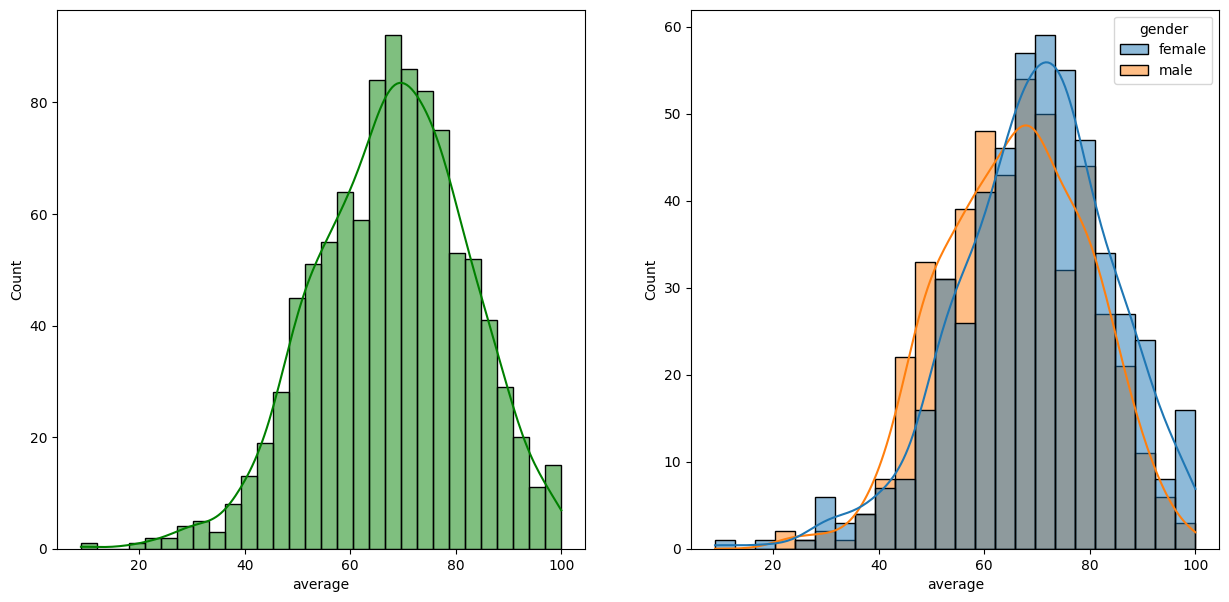

In [ ]:

# ========== CREATE SUBPLOT LAYOUT ==========
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
"""
fig = Entire figure canvas
axs = Array of 2 subplot axes [ax1, ax2]
"""

# ========== PLOT 1: OVERALL DISTRIBUTION (Left subplot) ==========
sns.histplot(
    data=df,           # Input DataFrame
    x='average',       # Numerical column for histogram
    bins=30,           # 30 bars (buckets) across data range
    kde=True,          # Overlay smooth density curve
    color='g',         # Green color for bars
    ax=axs[0]    
)
"""
SIGNIFICANCE: Shows COMPLETE distribution of 'average' scores
- Shape: Normal? Skewed? Bimodal?
- Range: Min/max values
- Central tendency: Where most data clusters
- Outliers: Extreme values visible
"""

# ========== PLOT 2: GENDER SEGMENTATION (Right subplot) ==========
sns.histplot(
    data=df,           # Same DataFrame
    x='average',       # Same numerical column
    kde=True,          # Density curve for each group
    hue='gender',      # SPLIT by gender (auto colors)
    ax=axs[1]         
)
"""
SIGNIFICANCE: COMPARE distributions across categories
- Do males/females have different average scores?
- Same shape or different patterns?
- Overlap between groups?
- Which group performs better?
"""

plt.show()          # Display final figure


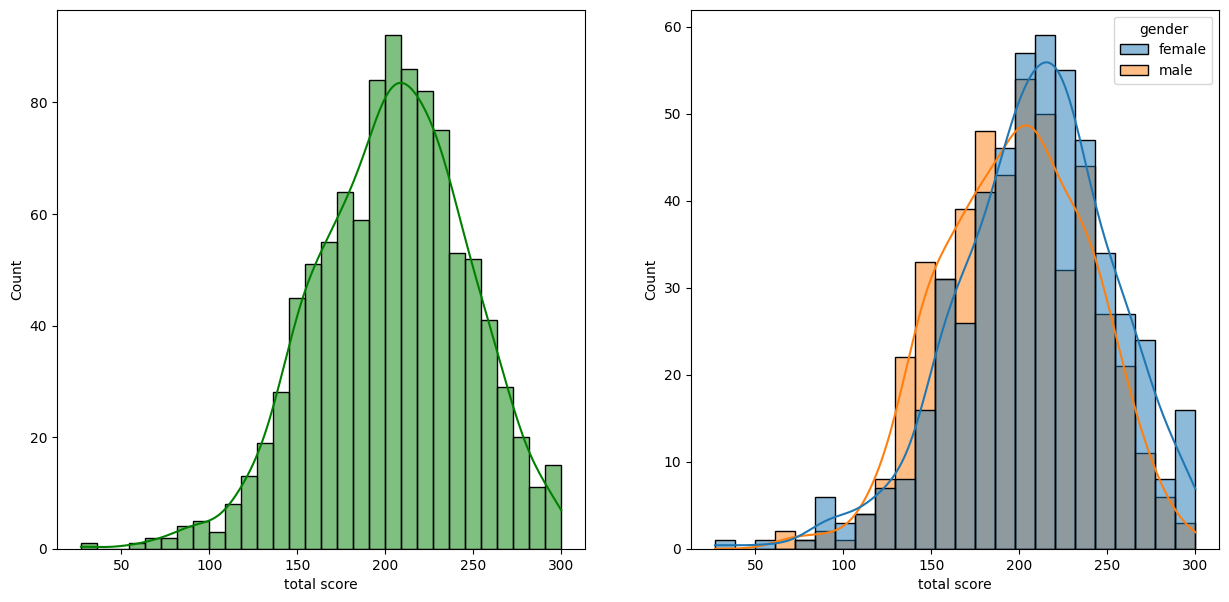

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g',ax=axs[0])
sns.histplot(data=df,x='total score',kde=True,hue='gender',ax=axs[1])
plt.show()
# - Standard lunch helps perform well in exams.
# - Standard lunch helps perform well in exams be it a male or a female.

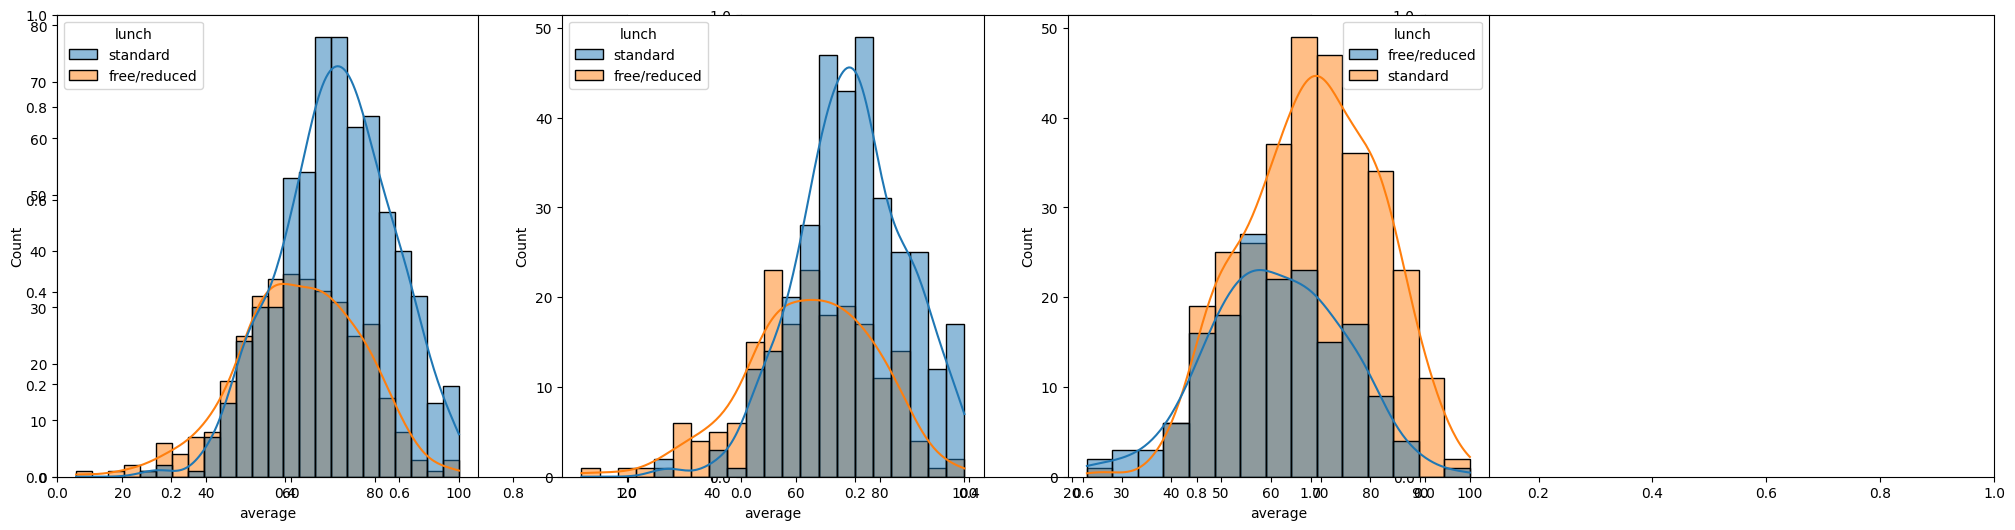

In [54]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

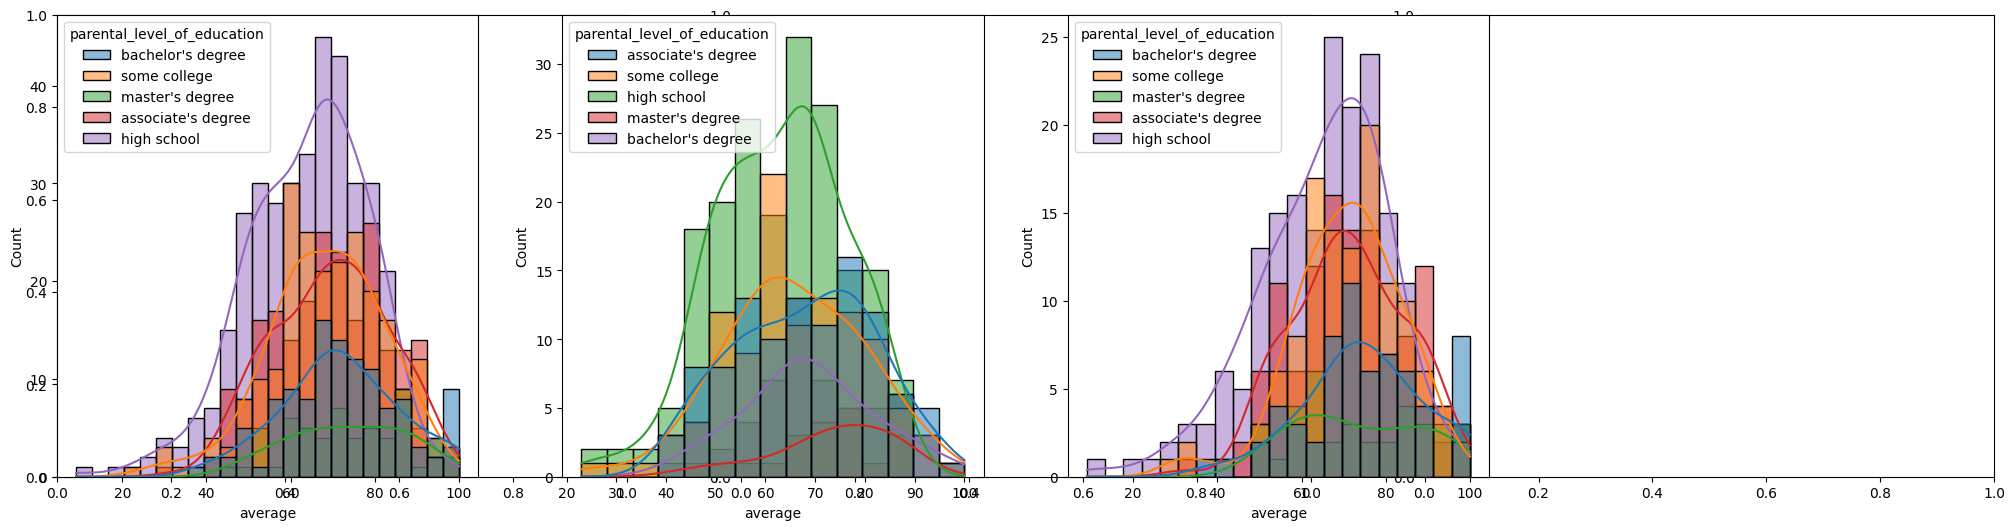

In [58]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

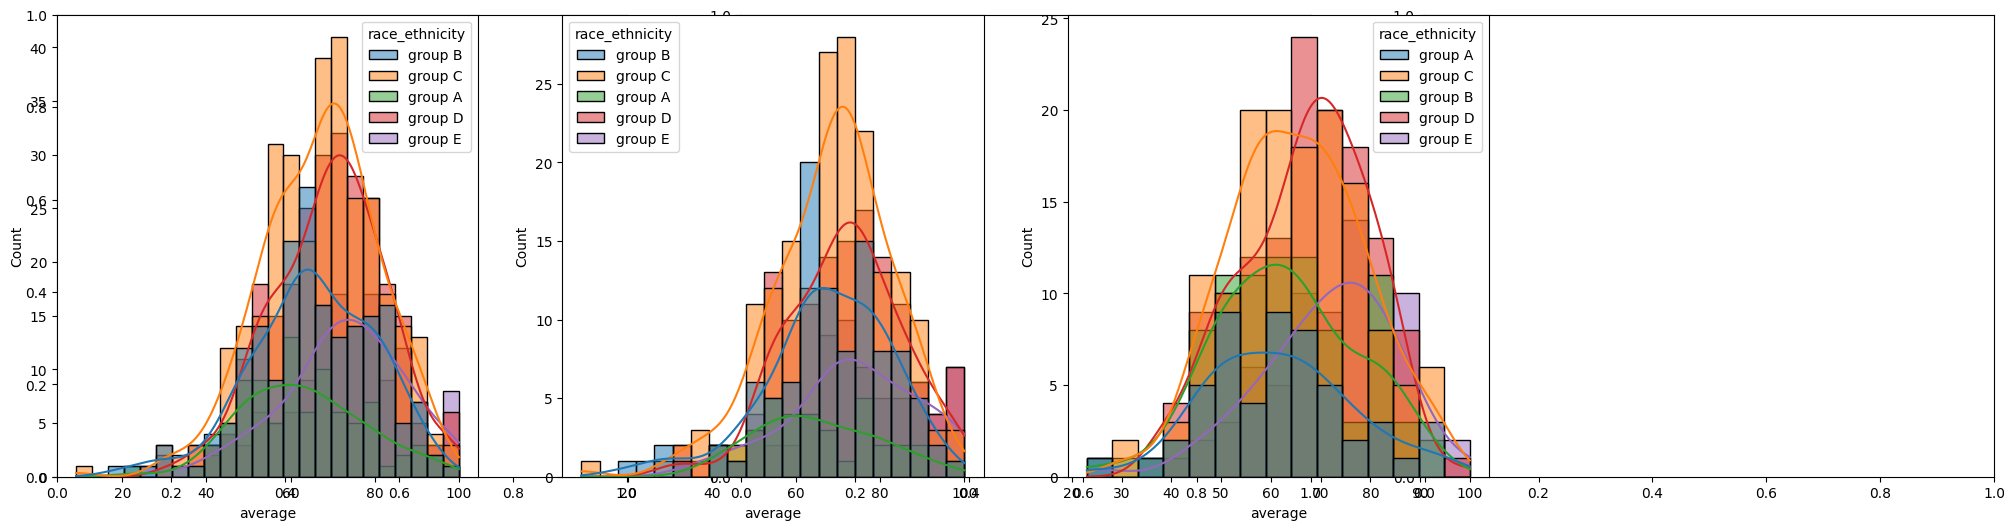

In [59]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

- General : Grp A and Group B has less average score , same for both males and females 
- Group A Males have very less average 

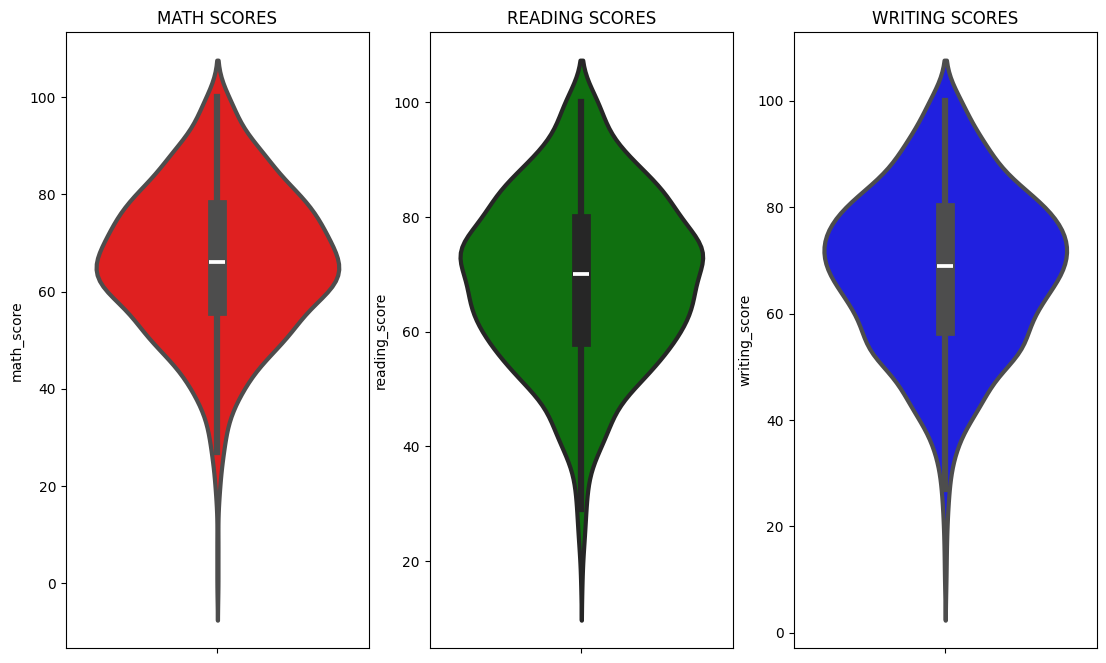

In [ ]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()
# Purpose: Visualize COMPLETE distribution shape + summary stats in single plot
# MATH has a long lower tail

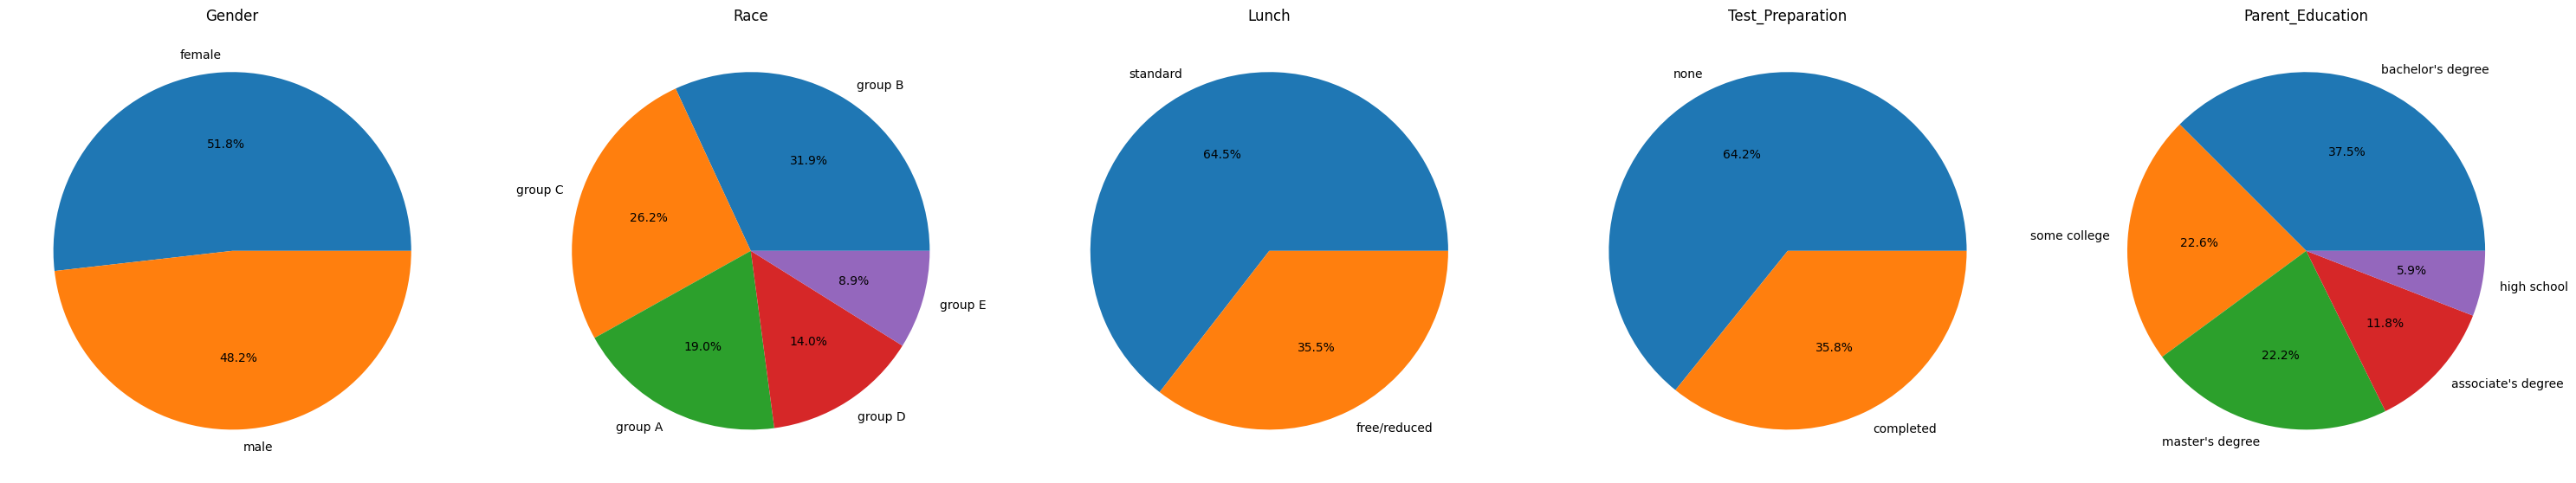

In [73]:
"""
1-LINE PIE CHART PER SUBPLOT - ULTRA COMPACT EDA
"""
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)


plt.subplot(1,5,1); plt.pie(df['gender'].value_counts(), labels=df['gender'].unique(), autopct='%2.1f%%', )
plt.title ("Gender")
plt.subplot(1,5,2); plt.pie(df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].unique(), autopct='%2.1f%%', )
plt.title ("Race")

plt.subplot(1,5,3); plt.pie(df['lunch'].value_counts(), labels=df['lunch'].unique(), autopct='%2.1f%%',)
plt.title ("Lunch")

plt.subplot(1,5,4); plt.pie(df['test_preparation_course'].value_counts(), labels=df['test_preparation_course'].unique(), autopct='%2.1f%%', )
plt.title ("Test_Preparation")

plt.subplot(1,5,5); plt.pie(df['parental_level_of_education'].value_counts(), labels=df['parental_level_of_education'].unique(), autopct='%2.1f%%', )
plt.title ("Parent_Education")

plt.axis('off'); plt.tight_layout(); plt.show()


#### UNIVARIATE ANALYSIS

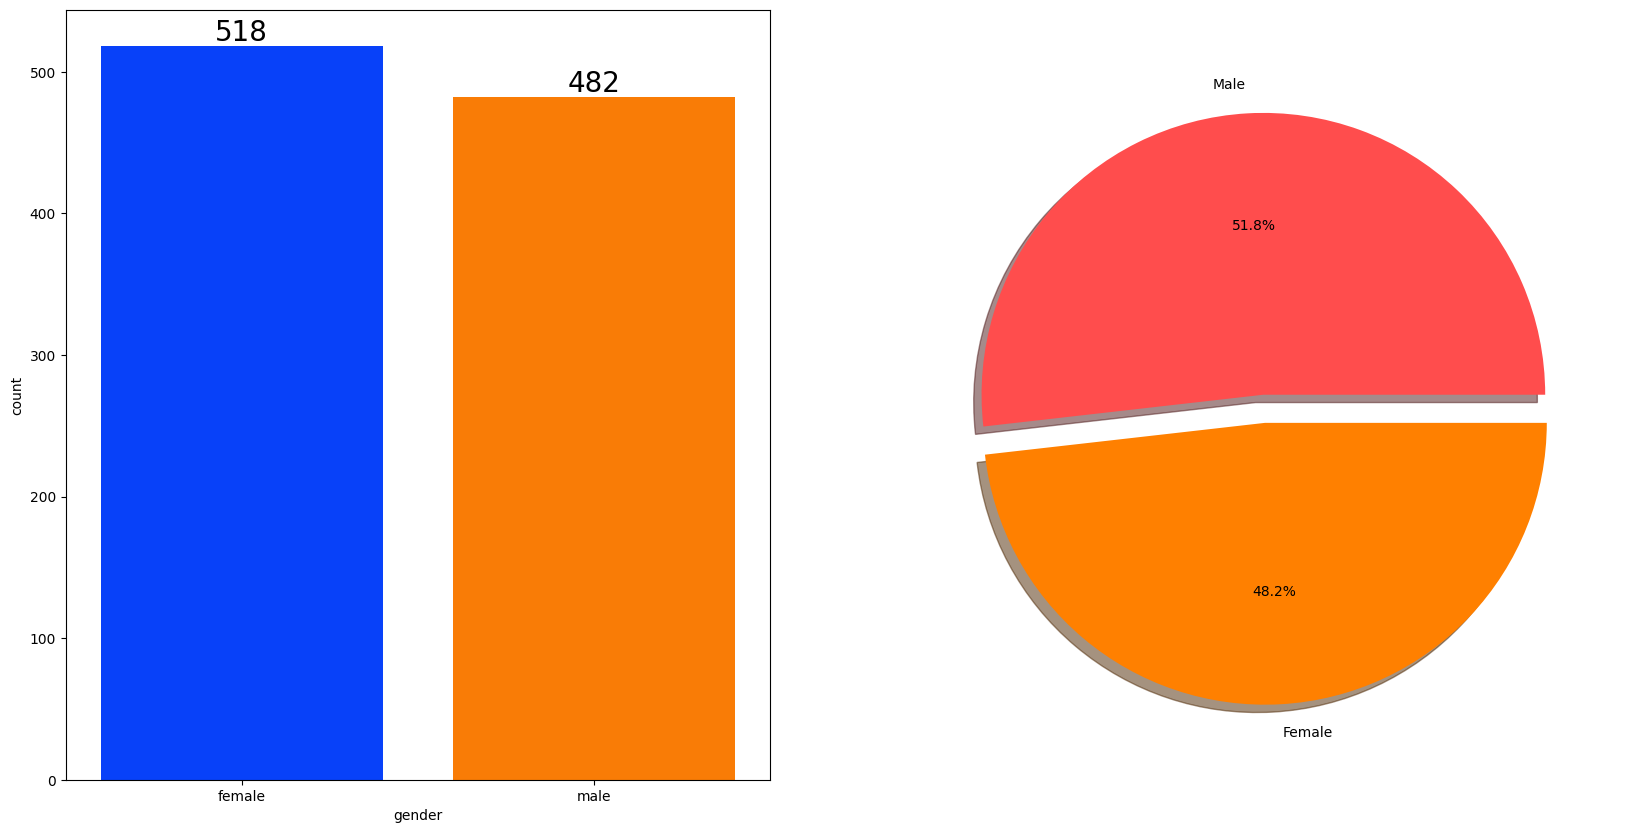

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

# - Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

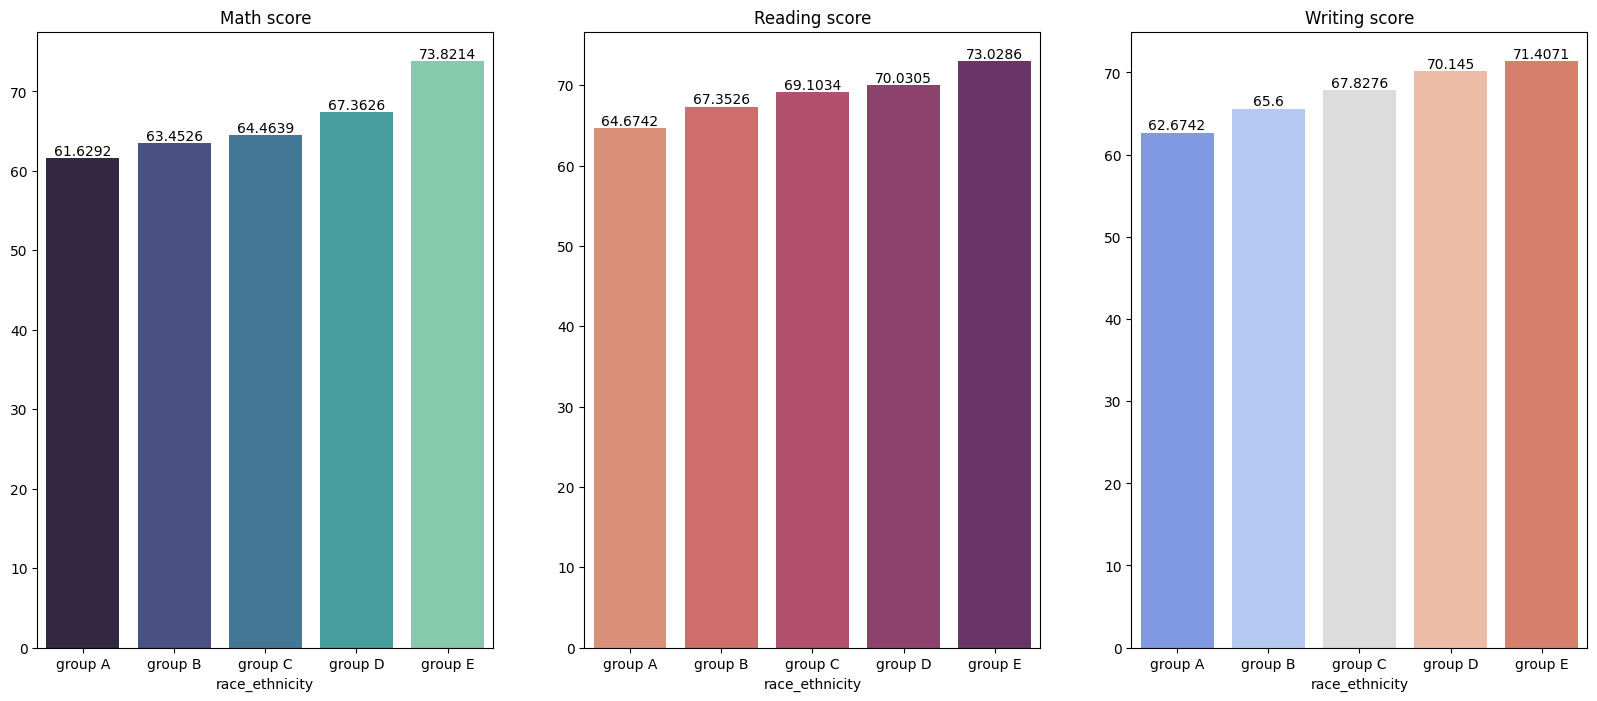

In [ ]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score')
for container in ax[0].containers:
    ax[0].bar_label(container)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score')

for container in ax[1].containers:
    ax[1].bar_label(container)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score')

for container in ax[2].containers:
    ax[2].bar_label(container)
# - Group E students have scored the highest marks. 
# - Group A students have scored the lowest marks. 
# - Students from a lower Socioeconomic status have a lower avg in all course subjects

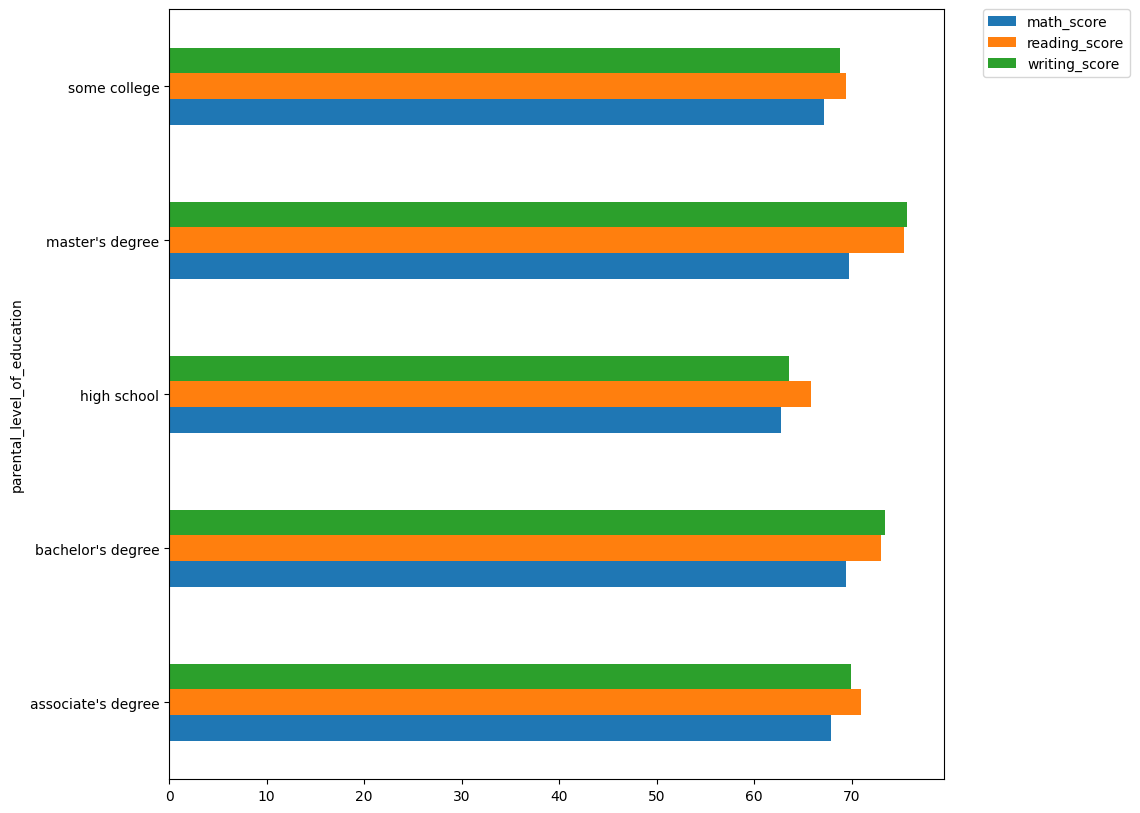

In [ ]:
df.groupby('parental_level_of_education')[num_feat].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
# - The score of student whose parents possess master and bachelor level education are higher than others.

In [111]:
temp=df.groupby('parental_level_of_education')[num_feat].mean()
print(temp)


                             math_score  reading_score  writing_score
parental_level_of_education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.786667      65.770667      63.613333
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708


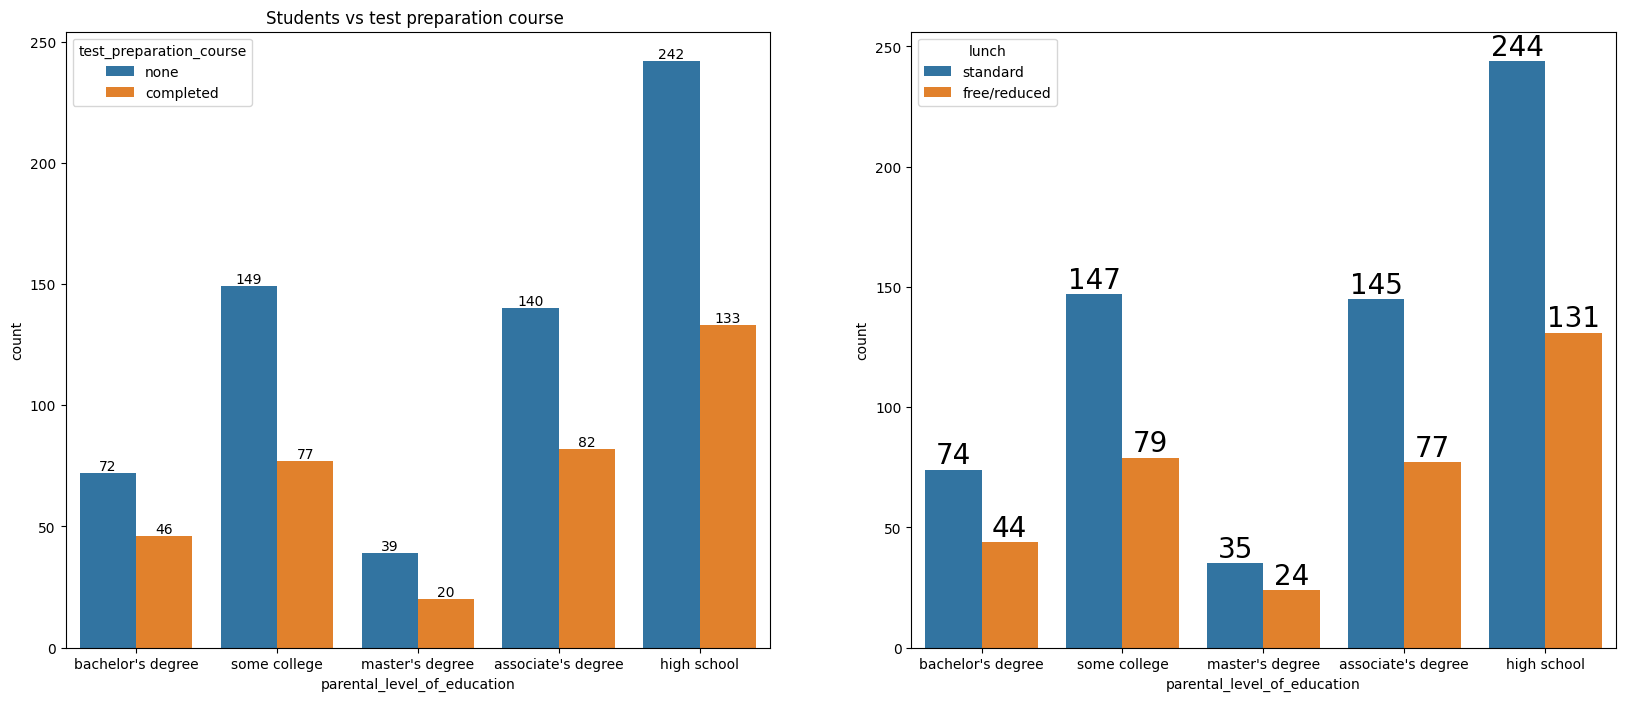

In [123]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,hue='test_preparation_course',ax=ax[0])
ax[0].set_title('Students vs test preparation course ')
for container in ax[0].containers:
    ax[0].bar_label(container)
    
sns.countplot(x=df['parental_level_of_education'],data=df,hue='lunch',ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

<Axes: xlabel='lunch', ylabel='writing_score'>

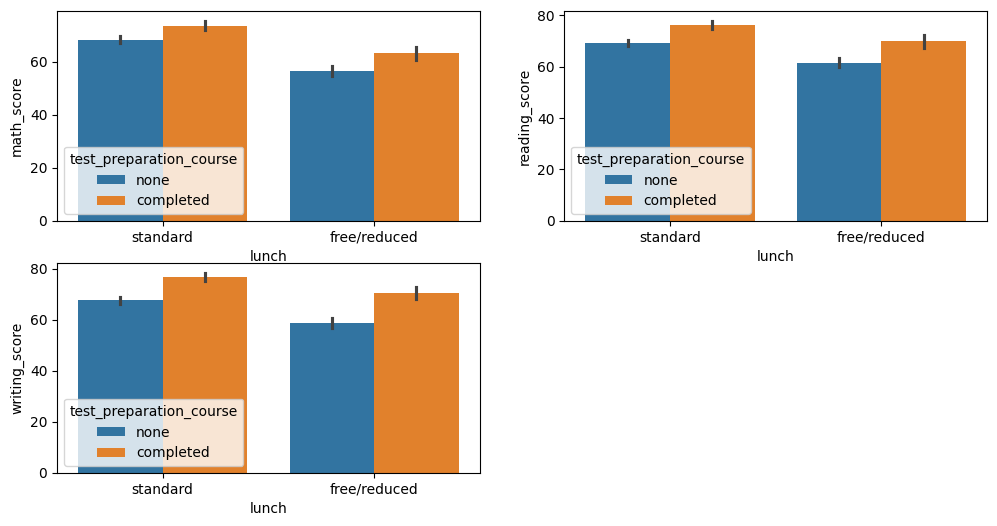

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
# - Students who get Standard Lunch tend to perform better than students who got free/reduced lunch
# - Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

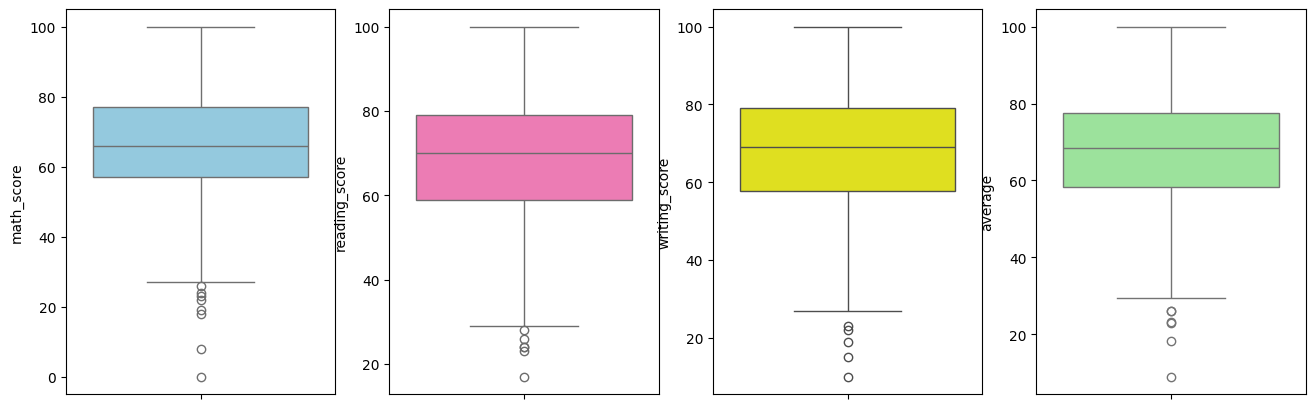

In [120]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

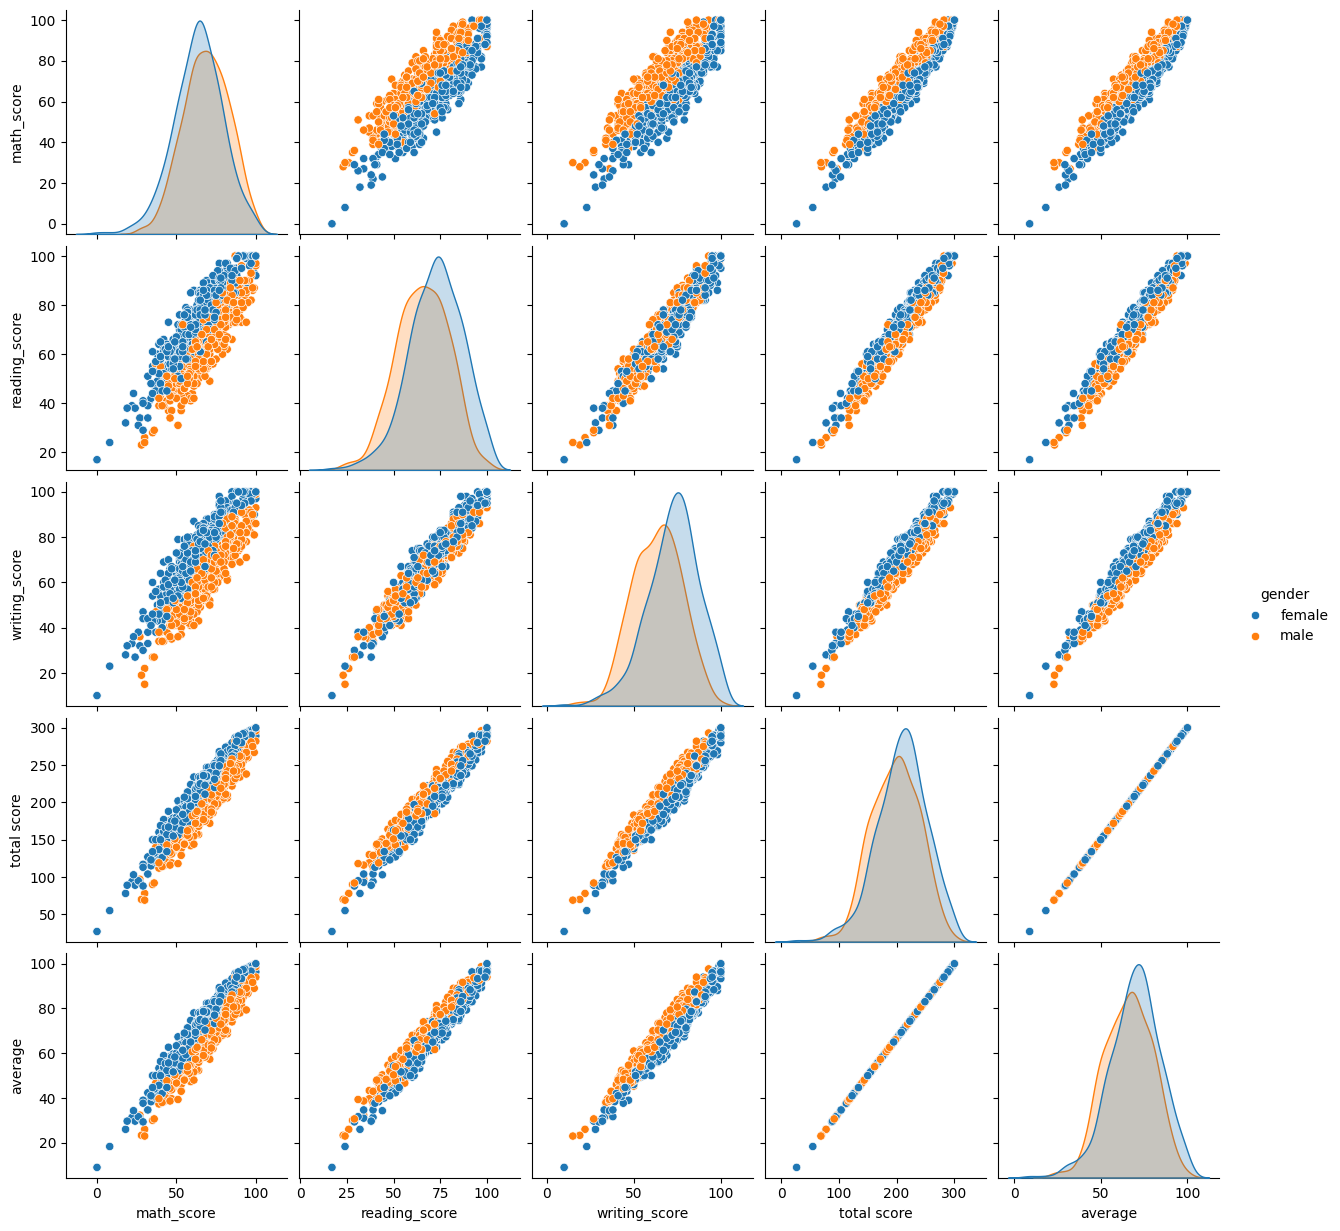

In [ ]:

# ========== ONE-LINE MULTIVARIATE ANALYSIS ==========
sns.pairplot(df, hue='gender')
plt.show()

"""

========== WHAT IT SHOWS FOR YOUR STUDENT DATA ==========

## NUMERICAL FEATURES (Primary Focus):
- math_score vs reading_score → Correlation? (r=0.8?)
- average vs writing_score → Linear relationship?
- Gender separation → Do males cluster differently?

##  CATEGORICAL FEATURES ('gender' as hue):
- Points colored by gender → Visual class separation
- Diagonal histograms → Male/Female score distributions
- Scatter transparency handles overlaps

##  KEY INSIGHTS TO LOOK FOR:
1. CORRELATION MATRIX (upper/lower triangles)
   - Strong positive? → Feature redundancy
   - Gender clustering? → Important predictor
   
2. DIAGONAL DISTRIBUTIONS
   - Normal? Multimodal? Skewed?
   - Gender differences in spread?

3. OUTLIERS
   - Extreme performers by gender?
   - Unusual score combinations?

"""

# - From the above plot it is clear that all the scores increase linearly with each other.